In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data_str = '''createTime  education  salary
2020-03-16 11:30:18  本科  20k-35k
2020-03-16 10:58:48  本科  20k-40k
2020-03-16 10:46:39  不限  20k-35k
2020-03-16 10:45:44  本科  13k-20k
2020-03-16 10:20:41  本科  10k-20k
2020-03-16 10:33:48  本科  10k-18k
2020-03-16 10:11:54  硕士  16k-30k
2020-03-16 09:49:12  本科  10k-15k
2020-03-16 09:25:48  不限  6k-8k
2020-03-16 09:35:50  本科  12k-20k
2020-03-16 10:34:19  本科  15k-25k
2020-03-16 09:30:40  本科  8k-12k
2020-03-16 11:30:17  本科  20k-40k
2020-03-16 10:54:56  本科  20k-30k
2020-03-15 12:14:45  本科  25k-35k
2020-03-16 10:52:14  硕士  10k-15k
2020-03-16 10:36:57  本科  25k-50k
2020-03-16 11:01:23  本科  10k-15k
2020-03-16 11:01:22  本科  30k-40k
2020-03-16 11:03:56  本科  15k-25k'''
data = [row.split('  ') for row in data_str.split('\n')]

In [13]:
import openpyxl

def writer_excel(file_name, args: list, sheet_title="sheet1"):
    # 创建一个全新的Excel文件
    wb = openpyxl.Workbook()
    # 创建sheet
    # !!!! index 参数必须传递，否者导致写入数据错误
    sheet = wb.create_sheet(title=sheet_title, index=0)
    # 行写入
    for line in args:
        sheet.append(line)
    # 保存文件
    wb.save(file_name)

writer_excel('outputdir/data.xlsx', data)

In [14]:
# 21.读取本地EXCEL数据

In [17]:
df = pd.read_excel('outputdir/data.xlsx')

In [16]:
# 22.查看df数据前5行

In [18]:
df.head()

,createTime,education,salary
0,2020-03-16 11:30:18,本科,20k-35k
1,2020-03-16 10:58:48,本科,20k-40k
2,2020-03-16 10:46:39,不限,20k-35k
3,2020-03-16 10:45:44,本科,13k-20k
4,2020-03-16 10:20:41,本科,10k-20k


In [19]:
# 23.将salary列数据转换为最大值与最小值的平均值

In [26]:
def get_mean(data_range):
    mima_list = data_range.split('-')
    arg0 = str(mima_list[0])
    arg0 = int(arg0[:len(arg0) - 1])
    arg1 = str(mima_list[1])
    arg1 = int(arg1[:len(arg1) - 1])
    mean_arg = (arg0 + arg1) / 2
    return str(mean_arg) + 'K'

df['salary'] = [get_mean(row) for row in df['salary'].values]

In [27]:
df

,createTime,education,salary
0,2020-03-16 11:30:18,本科,27.5K
1,2020-03-16 10:58:48,本科,30.0K
2,2020-03-16 10:46:39,不限,27.5K
3,2020-03-16 10:45:44,本科,16.5K
4,2020-03-16 10:20:41,本科,15.0K
5,2020-03-16 10:33:48,本科,14.0K
6,2020-03-16 10:11:54,硕士,23.0K
7,2020-03-16 09:49:12,本科,12.5K
8,2020-03-16 09:25:48,不限,7.0K
9,2020-03-16 09:35:50,本科,16.0K


In [28]:
# 23-1 将salary中数据提出来，去掉科学计数

In [39]:
import re
df['salary'] = [float(re.match('\d+\\.\d+', row).group()) * 1000 for row in df['salary'].values]
df

,createTime,education,salary
0,2020-03-16 11:30:18,本科,27500.0
1,2020-03-16 10:58:48,本科,30000.0
2,2020-03-16 10:46:39,不限,27500.0
3,2020-03-16 10:45:44,本科,16500.0
4,2020-03-16 10:20:41,本科,15000.0
5,2020-03-16 10:33:48,本科,14000.0
6,2020-03-16 10:11:54,硕士,23000.0
7,2020-03-16 09:49:12,本科,12500.0
8,2020-03-16 09:25:48,不限,7000.0
9,2020-03-16 09:35:50,本科,16000.0


In [40]:
# 24.将数据根据学历进行分组并计算平均薪资

In [42]:
df.groupby(['education'])[['salary']].mean()

,salary
education,
不限,17250.00
本科,21968.75
硕士,17750.00


In [43]:
# 25.将createTime列时间转换为月-日

In [46]:
df['createTime'] = [re.match('\d{4}-(\d{2}-\d{2}).+', row).group(1) for row in df['createTime'].values]
df

,createTime,education,salary
0,03-16,本科,27500.0
1,03-16,本科,30000.0
2,03-16,不限,27500.0
3,03-16,本科,16500.0
4,03-16,本科,15000.0
5,03-16,本科,14000.0
6,03-16,硕士,23000.0
7,03-16,本科,12500.0
8,03-16,不限,7000.0
9,03-16,本科,16000.0


In [ ]:
# 26.查看索引、数据类型和内存信息

**df.info() 可以查看内存信息**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   createTime  20 non-null     object 
 1   education   20 non-null     object 
 2   salary      20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 612.0+ bytes


In [50]:
# 27.查看数值型列的汇总统计

In [51]:
df.describe()

,salary
count,20.000000
mean,21075.000000
std,8830.680668
min,7000.000000
25%,13625.000000
50%,20000.000000
75%,28125.000000
max,37500.000000


In [52]:
# 28.新增一列根据salary将数据分为三组

In [62]:
pd.qcut(df['salary'], 3)

0       (26666.667, 37500.0]
1       (26666.667, 37500.0]
2       (26666.667, 37500.0]
3     (15333.333, 26666.667]
4      (6999.999, 15333.333]
5      (6999.999, 15333.333]
6     (15333.333, 26666.667]
7      (6999.999, 15333.333]
8      (6999.999, 15333.333]
9     (15333.333, 26666.667]
10    (15333.333, 26666.667]
11     (6999.999, 15333.333]
12      (26666.667, 37500.0]
13    (15333.333, 26666.667]
14      (26666.667, 37500.0]
15     (6999.999, 15333.333]
16      (26666.667, 37500.0]
17     (6999.999, 15333.333]
18      (26666.667, 37500.0]
19    (15333.333, 26666.667]
Name: salary, dtype: category
Categories (3, interval[float64, right]): [(6999.999, 15333.333] < (15333.333, 26666.667] < (26666.667, 37500.0]]

In [64]:
bins = [0, 15334, 26677, 40000]
label_names = ['低', '中', '高']
df['categories'] = pd.cut(df['salary'], bins, labels=label_names)
df

,createTime,education,salary,s_group_range,categories
0,03-16,本科,27500.0,"(26677, 40000]",高
1,03-16,本科,30000.0,"(26677, 40000]",高
2,03-16,不限,27500.0,"(26677, 40000]",高
3,03-16,本科,16500.0,"(15334, 26677]",中
4,03-16,本科,15000.0,"(0, 15334]",低
5,03-16,本科,14000.0,"(0, 15334]",低
6,03-16,硕士,23000.0,"(15334, 26677]",中
7,03-16,本科,12500.0,"(0, 15334]",低
8,03-16,不限,7000.0,"(0, 15334]",低
9,03-16,本科,16000.0,"(15334, 26677]",中


### cut 自定义分组
- x： 分组应用数据
- bins： 分组区间
- right：左开右闭区间， 默认True，False为左闭右开 
- labels: 标签列
- retbins
- precision
- incloude_lowest
- duplicates
- ordered

In [66]:
### qcut()

In [67]:
# 29.按照salary列对数据降序排列

In [69]:
df.sort_values(by='salary', ascending=False, inplace=True)
df

,createTime,education,salary,s_group_range,categories
16,03-16,本科,37500.0,"(26677, 40000]",高
18,03-16,本科,35000.0,"(26677, 40000]",高
1,03-16,本科,30000.0,"(26677, 40000]",高
14,03-15,本科,30000.0,"(26677, 40000]",高
12,03-16,本科,30000.0,"(26677, 40000]",高
0,03-16,本科,27500.0,"(26677, 40000]",高
2,03-16,不限,27500.0,"(26677, 40000]",高
13,03-16,本科,25000.0,"(15334, 26677]",中
6,03-16,硕士,23000.0,"(15334, 26677]",中
10,03-16,本科,20000.0,"(15334, 26677]",中


In [75]:
# 30.取出第15行数据

In [76]:
df.loc[15]

createTime            03-16
education                硕士
salary              12500.0
s_group_range    (0, 15334]
categories                低
Name: 15, dtype: object

In [77]:
# 31.计算salary列的中位数

In [78]:
df['salary'].median()

20000.0

In [79]:
# 32.绘制薪资水平频率分布直方图

### plot 绘制
- kind {}

<Axes: ylabel='Frequency'>

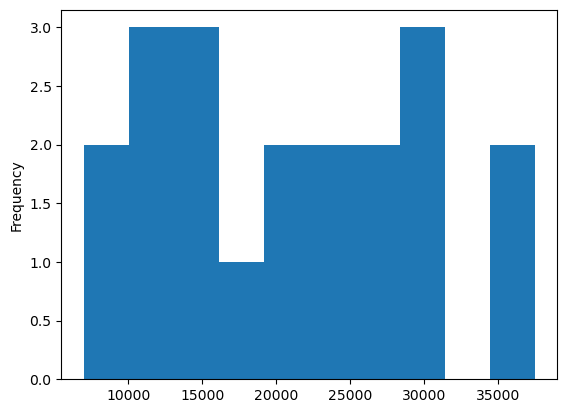

In [82]:
df['salary'].plot(kind='hist')

In [83]:
# 33.绘制薪资水平密度曲线

<Axes: ylabel='Density'>

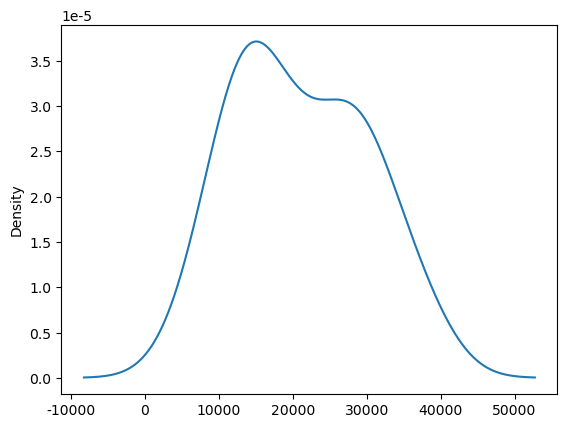

In [85]:
df['salary'].plot(kind='kde')

In [87]:
# 34.删除最后一列categories
df.head()

,createTime,education,salary,s_group_range,categories
16,03-16,本科,37500.0,"(26677, 40000]",高
18,03-16,本科,35000.0,"(26677, 40000]",高
1,03-16,本科,30000.0,"(26677, 40000]",高
14,03-15,本科,30000.0,"(26677, 40000]",高
12,03-16,本科,30000.0,"(26677, 40000]",高


In [91]:
df.drop(columns='s_group_range', inplace=True)

In [93]:
df.drop(columns='categories', inplace=True)
df.head()

,createTime,education,salary
16,03-16,本科,37500.0
18,03-16,本科,35000.0
1,03-16,本科,30000.0
14,03-15,本科,30000.0
12,03-16,本科,30000.0


In [94]:
# 35.将df的第一列与第二列合并为新的一列

In [95]:
df['new'] = df['createTime'] + df['education']

In [96]:
df.head()

,createTime,education,salary,new
16,03-16,本科,37500.0,03-16本科
18,03-16,本科,35000.0,03-16本科
1,03-16,本科,30000.0,03-16本科
14,03-15,本科,30000.0,03-15本科
12,03-16,本科,30000.0,03-16本科


In [97]:
# 36.将education列与salary列合并为新的一列

In [99]:
df['test'] = df['education'] + df['salary'].map(lambda x: str(x))

In [100]:
df

,createTime,education,salary,new,test
16,03-16,本科,37500.0,03-16本科,本科37500.0
18,03-16,本科,35000.0,03-16本科,本科35000.0
1,03-16,本科,30000.0,03-16本科,本科30000.0
14,03-15,本科,30000.0,03-15本科,本科30000.0
12,03-16,本科,30000.0,03-16本科,本科30000.0
0,03-16,本科,27500.0,03-16本科,本科27500.0
2,03-16,不限,27500.0,03-16不限,不限27500.0
13,03-16,本科,25000.0,03-16本科,本科25000.0
6,03-16,硕士,23000.0,03-16硕士,硕士23000.0
10,03-16,本科,20000.0,03-16本科,本科20000.0


In [101]:
# 37.计算salary最大值与最小值之差

In [102]:
df['salary'].max() - df['salary'].min()

30500.0

In [103]:
# 38.将第一行与最后一行拼接

**concat([]) 一定要注意参数1是【】**

In [113]:
pd.concat([df[:1], df[-1:]])

,createTime,education,salary,new,test
16,03-16,本科,37500.0,03-16本科,本科37500.0
8,03-16,不限,7000.0,03-16不限,不限7000.0


In [114]:
# 39.将第8行数据添加至末尾

In [119]:
pd.concat([df, df[8:9]])

,createTime,education,salary,new,test
16,03-16,本科,37500.0,03-16本科,本科37500.0
18,03-16,本科,35000.0,03-16本科,本科35000.0
1,03-16,本科,30000.0,03-16本科,本科30000.0
14,03-15,本科,30000.0,03-15本科,本科30000.0
12,03-16,本科,30000.0,03-16本科,本科30000.0
0,03-16,本科,27500.0,03-16本科,本科27500.0
2,03-16,不限,27500.0,03-16不限,不限27500.0
13,03-16,本科,25000.0,03-16本科,本科25000.0
6,03-16,硕士,23000.0,03-16硕士,硕士23000.0
10,03-16,本科,20000.0,03-16本科,本科20000.0


In [120]:
# 40.查看每列的数据类型

In [122]:
df.dtypes

createTime     object
education      object
salary        float64
new            object
test           object
dtype: object

In [123]:
# 41.将createTime列设置为索引

In [124]:
df.set_index('createTime')

,education,salary,new,test
createTime,,,,
03-16,本科,37500.0,03-16本科,本科37500.0
03-16,本科,35000.0,03-16本科,本科35000.0
03-16,本科,30000.0,03-16本科,本科30000.0
03-15,本科,30000.0,03-15本科,本科30000.0
03-16,本科,30000.0,03-16本科,本科30000.0
03-16,本科,27500.0,03-16本科,本科27500.0
03-16,不限,27500.0,03-16不限,不限27500.0
03-16,本科,25000.0,03-16本科,本科25000.0
03-16,硕士,23000.0,03-16硕士,硕士23000.0


In [125]:
# 42.生成一个和df长度相同的随机数dataframe

In [147]:
rand_data = np.random.randint(0, 10, (df.shape[0], 1))
r_df = pd.DataFrame(rand_data, columns=['rand'])
r_df.head()

,rand
0,3
1,3
2,4
3,0
4,8


In [133]:
# 43.将上一题生成的dataframe与df合并

**concat() axis决定按行合并还是按列合并**

In [160]:
df = pd.concat([df, r_df],axis=1)
df.head()

,createTime,education,salary,new,test,rand
16,03-16,本科,37500.0,03-16本科,本科37500.0,2
18,03-16,本科,35000.0,03-16本科,本科35000.0,3
1,03-16,本科,30000.0,03-16本科,本科30000.0,3
14,03-15,本科,30000.0,03-15本科,本科30000.0,0
12,03-16,本科,30000.0,03-16本科,本科30000.0,8


In [140]:
# 44.生成新的一列new为salary列减去之前生成随机数列

In [162]:
df['sub_result'] = df['salary'] - df['rand']
df.head()

,createTime,education,salary,new,test,rand,sub_result
16,03-16,本科,37500.0,03-16本科,本科37500.0,2,37498.0
18,03-16,本科,35000.0,03-16本科,本科35000.0,3,34997.0
1,03-16,本科,30000.0,03-16本科,本科30000.0,3,29997.0
14,03-15,本科,30000.0,03-15本科,本科30000.0,0,30000.0
12,03-16,本科,30000.0,03-16本科,本科30000.0,8,29992.0


In [163]:
# 45.检查数据中是否含有任何缺失值

In [166]:
np.any(df.isnull())

False

In [167]:
# 46.将salary列类型转换为浮点数

### astype() 指定数据类型
- 

In [169]:
df['salary'].astype(np.float32)

16    37500.0
18    35000.0
1     30000.0
14    30000.0
12    30000.0
0     27500.0
2     27500.0
13    25000.0
6     23000.0
10    20000.0
19    20000.0
3     16500.0
9     16000.0
4     15000.0
5     14000.0
7     12500.0
15    12500.0
17    12500.0
11    10000.0
8      7000.0
Name: salary, dtype: float32

In [170]:
# 47.计算salary大于10000的次数

In [174]:
len(df[df['salary'] > 10000])

18

In [175]:
# 48.查看每种学历出现的次数

In [177]:
df['education'].value_counts()

本科    16
不限     2
硕士     2
Name: education, dtype: int64

In [178]:
# 49.查看education列共有几种学历

In [179]:
df['education'].nunique()

3

In [180]:
# 50.提取salary与new列的和大于60000的最后3行

In [185]:
df[df['salary']>20000]

,createTime,education,salary,new,test,rand,sub_result
16,03-16,本科,37500.0,03-16本科,本科37500.0,2,37498.0
18,03-16,本科,35000.0,03-16本科,本科35000.0,3,34997.0
1,03-16,本科,30000.0,03-16本科,本科30000.0,3,29997.0
14,03-15,本科,30000.0,03-15本科,本科30000.0,0,30000.0
12,03-16,本科,30000.0,03-16本科,本科30000.0,8,29992.0
0,03-16,本科,27500.0,03-16本科,本科27500.0,3,27497.0
2,03-16,不限,27500.0,03-16不限,不限27500.0,4,27496.0
13,03-16,本科,25000.0,03-16本科,本科25000.0,9,24991.0
6,03-16,硕士,23000.0,03-16硕士,硕士23000.0,1,22999.0


In [186]:
result = df[(df['salary'] + df['sub_result']) > 40000].tail(3)
result

,createTime,education,salary,new,test,rand,sub_result
2,03-16,不限,27500.0,03-16不限,不限27500.0,4,27496.0
13,03-16,本科,25000.0,03-16本科,本科25000.0,9,24991.0
6,03-16,硕士,23000.0,03-16硕士,硕士23000.0,1,22999.0
